# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


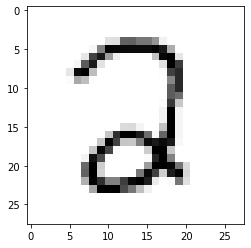

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2493
Training Accuracy: 0.5752, Testing Accuracy: 0.5610



Epoch 10, Loss 0.1001
Training Accuracy: 0.9146, Testing Accuracy: 0.9239



Epoch 20, Loss 0.0591
Training Accuracy: 0.9402, Testing Accuracy: 0.9511



Epoch 30, Loss 0.0461
Training Accuracy: 0.9498, Testing Accuracy: 0.9602



Epoch 40, Loss 0.0398
Training Accuracy: 0.9560, Testing Accuracy: 0.9647



Epoch 50, Loss 0.036
Training Accuracy: 0.9598, Testing Accuracy: 0.9698



Epoch 60, Loss 0.0334
Training Accuracy: 0.9617, Testing Accuracy: 0.9682



Epoch 70, Loss 0.0314
Training Accuracy: 0.9638, Testing Accuracy: 0.9688



Epoch 80, Loss 0.0299
Training Accuracy: 0.9649, Testing Accuracy: 0.9703



Epoch 90, Loss 0.0286
Training Accuracy: 0.9669, Testing Accuracy: 0.9703



Epoch 100, Loss 0.0275
Training Accuracy: 0.9683, Testing Accuracy: 0.9713



Epoch 110, Loss 0.0266
Training Accuracy: 0.9685, Testing Accuracy: 0.9718



Epoch 120, Loss 0.0258
Training Accuracy: 0.9696, Testing Accuracy: 0.9738



Epoch 130, Loss 0.025
Training Accuracy: 0.9710, Testing Accuracy: 0.9723



Epoch 140, Loss 0.0243
Training Accuracy: 0.9716, Testing Accuracy: 0.9718



Epoch 150, Loss 0.0237
Training Accuracy: 0.9724, Testing Accuracy: 0.9723



Epoch 160, Loss 0.0231
Training Accuracy: 0.9734, Testing Accuracy: 0.9728



Epoch 170, Loss 0.0226
Training Accuracy: 0.9740, Testing Accuracy: 0.9728



Epoch 180, Loss 0.0221
Training Accuracy: 0.9749, Testing Accuracy: 0.9718



Epoch 190, Loss 0.0217
Training Accuracy: 0.9755, Testing Accuracy: 0.9723



Epoch 200, Loss 0.0212
Training Accuracy: 0.9758, Testing Accuracy: 0.9723



Epoch 210, Loss 0.0208
Training Accuracy: 0.9765, Testing Accuracy: 0.9728



Epoch 220, Loss 0.0204
Training Accuracy: 0.9771, Testing Accuracy: 0.9733



Epoch 230, Loss 0.02
Training Accuracy: 0.9770, Testing Accuracy: 0.9738



Epoch 240, Loss 0.0196
Training Accuracy: 0.9773, Testing Accuracy: 0.9738



0.0035684958301764815

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2429
Training Accuracy: 0.6749, Testing Accuracy: 0.6966



Epoch 10, Loss 0.1047
Training Accuracy: 0.9069, Testing Accuracy: 0.9254



Epoch 20, Loss 0.0799
Training Accuracy: 0.9283, Testing Accuracy: 0.9415



Epoch 30, Loss 0.0686
Training Accuracy: 0.9361, Testing Accuracy: 0.9486



Epoch 40, Loss 0.0619
Training Accuracy: 0.9407, Testing Accuracy: 0.9511



Epoch 50, Loss 0.0574
Training Accuracy: 0.9444, Testing Accuracy: 0.9561



Epoch 60, Loss 0.054
Training Accuracy: 0.9466, Testing Accuracy: 0.9577



Epoch 70, Loss 0.0514
Training Accuracy: 0.9480, Testing Accuracy: 0.9602



Epoch 80, Loss 0.0494
Training Accuracy: 0.9494, Testing Accuracy: 0.9612



Epoch 90, Loss 0.0477
Training Accuracy: 0.9506, Testing Accuracy: 0.9627



Epoch 100, Loss 0.0462
Training Accuracy: 0.9518, Testing Accuracy: 0.9642



Epoch 110, Loss 0.045
Training Accuracy: 0.9531, Testing Accuracy: 0.9647



Epoch 120, Loss 0.044
Training Accuracy: 0.9544, Testing Accuracy: 0.9637



Epoch 130, Loss 0.043
Training Accuracy: 0.9555, Testing Accuracy: 0.9642



Epoch 140, Loss 0.0422
Training Accuracy: 0.9561, Testing Accuracy: 0.9652



Epoch 150, Loss 0.0414
Training Accuracy: 0.9567, Testing Accuracy: 0.9657



Epoch 160, Loss 0.0408
Training Accuracy: 0.9575, Testing Accuracy: 0.9657



Epoch 170, Loss 0.0401
Training Accuracy: 0.9579, Testing Accuracy: 0.9657



Epoch 180, Loss 0.0396
Training Accuracy: 0.9582, Testing Accuracy: 0.9657



Epoch 190, Loss 0.0391
Training Accuracy: 0.9585, Testing Accuracy: 0.9657



Epoch 200, Loss 0.0386
Training Accuracy: 0.9593, Testing Accuracy: 0.9657



Epoch 210, Loss 0.0381
Training Accuracy: 0.9594, Testing Accuracy: 0.9662



Epoch 220, Loss 0.0377
Training Accuracy: 0.9597, Testing Accuracy: 0.9662



Epoch 230, Loss 0.0373
Training Accuracy: 0.9599, Testing Accuracy: 0.9662



Epoch 240, Loss 0.037
Training Accuracy: 0.9605, Testing Accuracy: 0.9662



0.027015632777403136

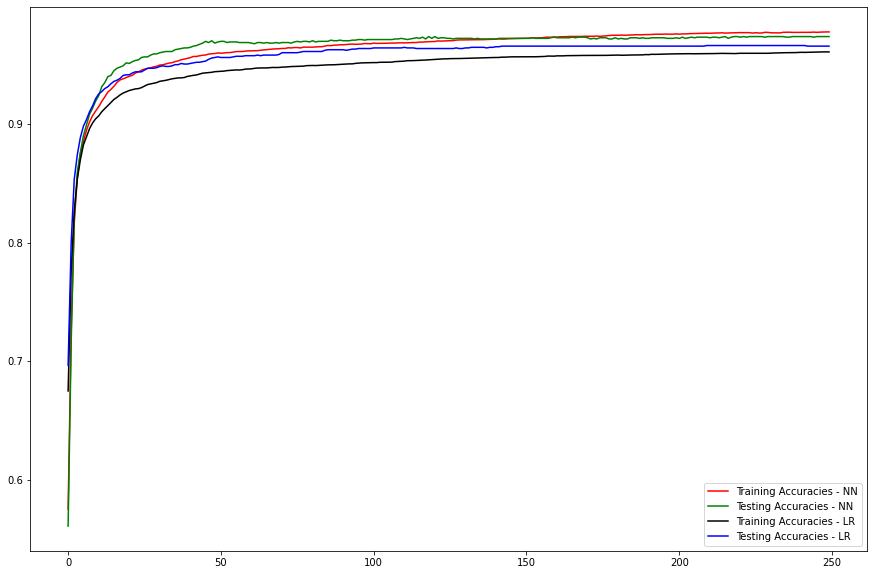

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

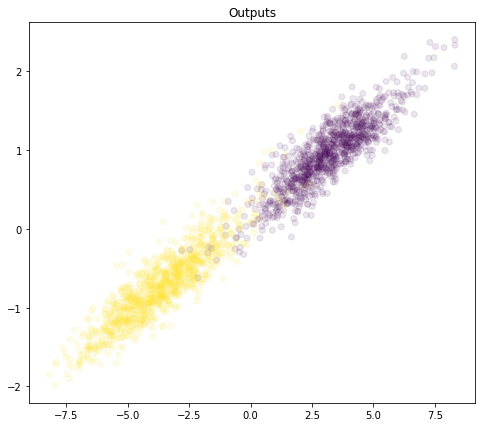

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

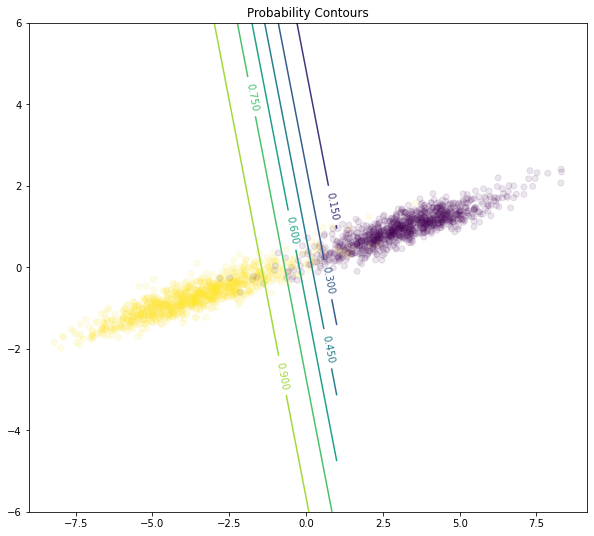

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );